In [24]:
%pylab inline
import pandas as pd
import seaborn
import tensorflow as tf
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

figsize(10,8)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Load train and test sets

In [25]:
train = pd.read_excel('Kick Training Data_.xlsx')
test = pd.read_excel('Kick Test Data_.xlsx')

In [26]:
t_f = train[['period_minute', 'Start_X', 'Start_Y', 'Temperature', 'HomeHalfTimeLeadFlag', 'WinFlag', 'HomeTeamWin', 'DewPoint', 'Humidity', 'Visibility', 'WindDirection', 'WindSpeed']]

In [27]:
train.shape, t_f.shape

((794, 78), (794, 12))

In [28]:
ss = StandardScaler()

new_t_f = pd.DataFrame(ss.fit_transform(t_f))   #[['Start_X', 'Start_Y']]

In [29]:
new_t_f.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.552801,-1.600310,1.400052,0.467127,-1.161513,-1.149625,-1.149625,1.345463,1.059445,-0.758210,0.626771,2.750441
1,-1.419497,-0.731855,-1.123278,0.467127,-1.161513,-1.149625,-1.149625,1.345463,1.059445,-0.758210,0.626771,2.750441
2,-1.019587,1.487530,0.023691,0.467127,-1.161513,-1.149625,-1.149625,1.348378,1.059445,-0.790302,0.616364,2.750441
3,-0.841849,-0.345875,0.998613,0.467127,-1.161513,-1.149625,-1.149625,1.348378,1.059445,-0.790302,0.616364,2.750441
4,-0.619676,-0.056390,0.253084,0.467127,-1.161513,-1.149625,-1.149625,1.352751,1.059445,-0.758210,0.616364,2.750441


In [5]:
def eval_model(y, y_, X_test, y_test):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))  #list of booleans
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  #cast to floating point numbers and then take the mean

    return(sess.run(accuracy, feed_dict={x: X_test, y_: y_test}))

In [31]:
var_shape = 12
out_shape = 2
x = tf.placeholder(tf.float32, [None, var_shape])

W = tf.Variable(tf.random_uniform([var_shape, 8]))
b = tf.Variable(tf.random_uniform([8]))

W2 = tf.Variable(tf.zeros([8, 6]))
b2 = tf.Variable(tf.random_uniform([6]))

W3 = tf.Variable(tf.zeros([6, out_shape]))
b3 = tf.Variable(tf.random_uniform([out_shape]))

layer1 = (tf.matmul(x, W) + b)
layer1 = tf.nn.relu(layer1)

layer2 = tf.matmul(layer1, W2) + b2
layer2 = tf.nn.relu(layer2)

layer3 = tf.matmul(layer2, W3) + b3
layer3 = tf.nn.relu(layer3)

y = layer3

y_ = tf.placeholder(tf.float32, [None, 2])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [32]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

target = pd.get_dummies(pd.factorize(train['ActionName'].values)[0]).values
X_train, X_test, y_train, y_test = train_test_split(new_t_f.values, target)

for i in range(10001):
    X_train_s, _, y_train_s, _ = train_test_split(X_train, y_train, test_size=.9)
    ce, state = sess.run([cross_entropy, train_step], feed_dict={x: X_train_s, y_: y_train_s})

    if i % 1000 == 0:
        acc = eval_model(y, y_, X_test, y_test)
        print(ce)

0.752901
0.61893
0.38988
0.512843
0.501099
0.596387
0.503924
0.464376
0.451756
0.54525
0.504432


In [1]:
from sklearn.datasets import samples_generator
%pylab inline
import pandas as pd
import seaborn
import tensorflow as tf
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

figsize(10,8)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def eval_model(y, y_, X_test, y_test):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))  #list of booleans
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  #cast to floating point numbers and then take the mean

    return(sess.run(accuracy, feed_dict={x: X_test, y_: y_test}))

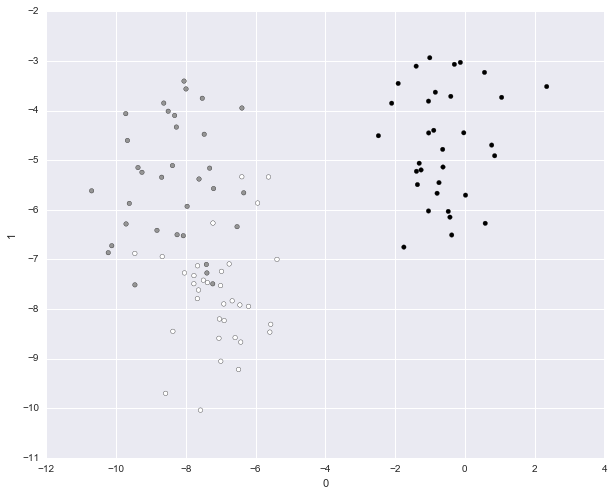

In [2]:
data = samples_generator.make_blobs()

df = pd.DataFrame(data[0])
df.plot.scatter(0, 1, c=data[1])

In [3]:
x = tf.placeholder(tf.float32, [None, 2])

W = tf.Variable(tf.random_uniform([2, 3]))
b = tf.Variable(tf.random_uniform([3]))

layer = (tf.matmul(x,W) + b)
y = layer
softmax = tf.nn.softmax(y)
y_ = tf.placeholder(tf.float32, [None, 3])

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [6]:
init = tf.initialize_all_variables()
sess = tf.Session()
print(sess.run(init))

X_train, X_test, y_train, y_test = train_test_split(data[0], pd.get_dummies(data[1]).values, train_size=.7)

for i in range(8001):
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train)
    
    l, o, output = sess.run([loss, optimizer, y], feed_dict={x: X_train_s, y_: y_train_s})
    if i % 1000 == 0:
        acc = eval_model(y, y_, X_test, y_test)
        print('Epoch: {} - Loss: {} Acc: {}'.format(i, l, acc))

None
Epoch: 0 - Loss: 4.01738452911 Acc: 0.266666680574
Epoch: 1000 - Loss: 0.172827750444 Acc: 0.933333337307
Epoch: 2000 - Loss: 0.14855197072 Acc: 0.933333337307
Epoch: 3000 - Loss: 0.2363743186 Acc: 0.933333337307
Epoch: 4000 - Loss: 0.16963082552 Acc: 0.933333337307
Epoch: 5000 - Loss: 0.144685655832 Acc: 0.933333337307
Epoch: 6000 - Loss: 0.17812974751 Acc: 0.933333337307
Epoch: 7000 - Loss: 0.126617446542 Acc: 0.933333337307
Epoch: 8000 - Loss: 0.209899961948 Acc: 0.933333337307


In [7]:
output = sess.run(softmax, feed_dict={x: data[0], y_: pd.get_dummies(data[1]).values})
output = output.argmax(axis=1)

In [8]:
size = (data[1] == output)

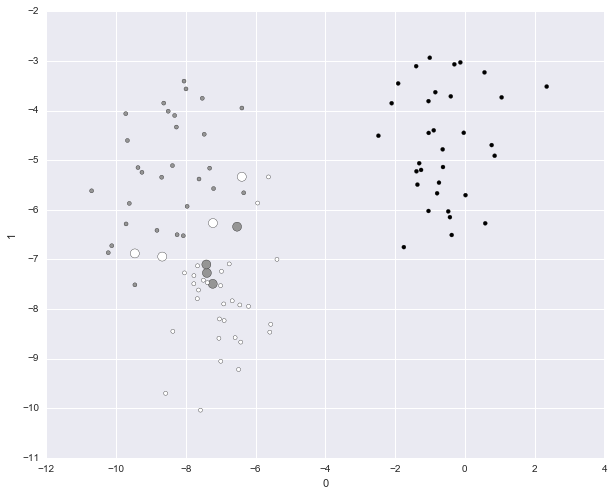

In [9]:
df.plot.scatter(0, 1, c=data[1], s=(~size+2)**4)  #df[1]